In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## Модель $ N(\theta,1)$

В модели $N(\theta,1)$ оценка максимального правдоподобия - $\overline{X}$

Байесовской оценкой параметра $\theta$ будет $E(\theta|X)$

Сопряженное априорное распределение для $ N(\theta,1)$ - это $N(\mu_{0},\sigma_{0})$

Гиперпараметры апостериорного распределения: $\mu =\left.\left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right)\right/\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)$

Апостериорное распределение ~ $N(\mu,\sigma_{2}^2)$ => $E(\theta|X) = \mu = \hat{\theta}$

Масштабы для априорного распределения ($\mu_{0}, \sigma_{0}$): (0, 1), (0, 100), (10, 1), (10, 100)

### Сгенерируем выборку из распределения $N(0,1)$


In [3]:
sample = scipy.stats.norm.rvs(size=100) 

### Функция для вычисления $\hat{\theta}$

In [4]:
def calculate(sample,m0,sigma0,sigma,n):
    summ = sample.cumsum()
    result = (float(m0)/float(sigma0)+ summ/float(sigma)) \
              / (1./float(sigma0)+ np.arange(1,n+1)/float(sigma))
    return result


#### Параметры $\mu_0$ и $\sigma_0^2$

In [5]:
param_mu = [0.,0.,10.,10.]
param_sigm = [1.,100.,1.,100.]

### $\overline{X}$ и байесовская оценка $\hat{\theta}$ в зависимости от n

In [6]:
numbers = np.arange(1,101)
means = sample.cumsum() / numbers

In [7]:
bayes_estim = []
for i in range(len(param_mu)):
    bayes_estim.append(calculate(sample,param_mu[i],param_sigm[i],1,100))

### Графики абсолютной величины отклонения оценки от истинного значения параметра в зависимости от n для оценки максимального правдоподобия и байесовских оценкок

In [8]:
def graphs(means, bayes):
    plt.figure(figsize=(20,10))
    n = range(1,101)
    plt.plot(n, map(abs,means), linewidth = 6, color='orange' ,alpha = 0.3,
             label='$\overline{X}$')
    
    for i in range(len(bayes)):
        plt.plot(n, map(abs, bayes[i]),label='p = ' + '(' + 
                 str(param_mu[i])+ ',' +str(param_sigm[i]) + ')')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
    plt.ylim(0,0.4)
    plt.grid(True)

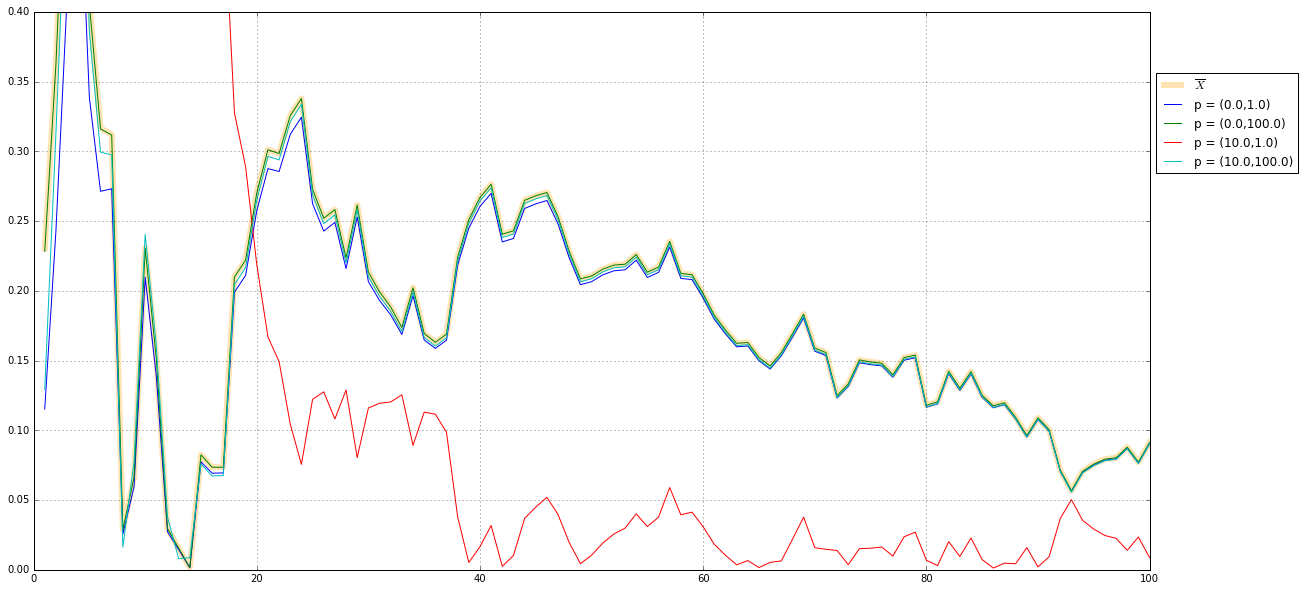

In [9]:
graphs(means,bayes_estim)

Выводы:

Лучшая оценка - байесовская с априорным $N(10,1)$

Так же из графика видно,что кривые с параметрами (0, 1), (0, 100) и (10, 100) и $\; \overline{X}$ почти совпадают.


## Модель $N(0,\theta)$

В модели $N(0,\theta)$ оценка максимального правдоподобия = $\; \overline{{(X - a)}^2} = \overline{X^2}$.



Байесовской оценкой параметра $\theta$ будет $E(\theta|X)$

Найдем сопряженное априорное распределение для $ N(0,\theta)$ - это Обратное гамма-распределение ($\Gamma_{Inv}$( $\alpha,\beta$) )

Гиперпараметры апостериорного распределения: $\alpha_{1}=$ $\mathbf{\alpha}+\frac{n}{2}$, $\beta_{1}
=$ $ \mathbf{\beta} + \frac{\sum_{i=1}^n{(x_i-\mu)^2}}{2}$  (в нашем случае $\mu =0$)

Байесовская оценка $\hat{\theta} = E(\theta|X) = \frac{\beta_{1}}{\alpha_{1}-1} = \frac {2\beta+\sum_{i=1}^n{x_i^2}} {2\alpha+n-2}$



Масштабы для априорного распределения ($\alpha, \beta$): (1, 1), (1, 100), (100, 1), (10, 100)

### Функция для вычисления $\hat{\theta}$

In [10]:
def calculate_est(sample,alpha,beta,n):
    summ = sample.cumsum()
    result = (2.* float(beta) + summ**2)/ (2.*alpha + np.arange(1, n + 1)- 2.)
    return result

#### Параметры $\alpha$ и $\beta$

In [11]:
param_al = [1.,1.,100.,10.]
param_beta = [1.,100.,1.,100.]

### $\overline{X^2}$ и байесовская оценка $\hat{\theta}$ в зависимости от n

In [12]:
numbers = np.arange(1,101)
means = sample.cumsum() / numbers
x_2 = np.cumsum(map(lambda x : x ** 2, sample)) / numbers


In [13]:
bayes_estim = []
for i in range(len(param_al)):
    bayes_estim.append(calculate_est(sample,param_al[i],param_beta[i],100))

### Графики абсолютной величины отклонения оценки от истинного значения параметра в зависимости от n для оценки максимального правдоподобия и байесовских оценкок

In [19]:
def build_graphs(x_2, bayes):
    plt.figure(figsize=(20,10))
    n = range(1,101)
    
    plt.plot(n, map(abs,x_2-1), linewidth = 5, alpha = 0.3,
             label='$\overline{X^2}$')
    
    for i in range(len(bayes)):
        plt.plot(n, map(abs, bayes[i]-1),label='p = ' + '(' + str(param_al[i])+','
                 +str(param_beta[i]) + ')')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
    plt.ylim(0,6)
    plt.grid(True)

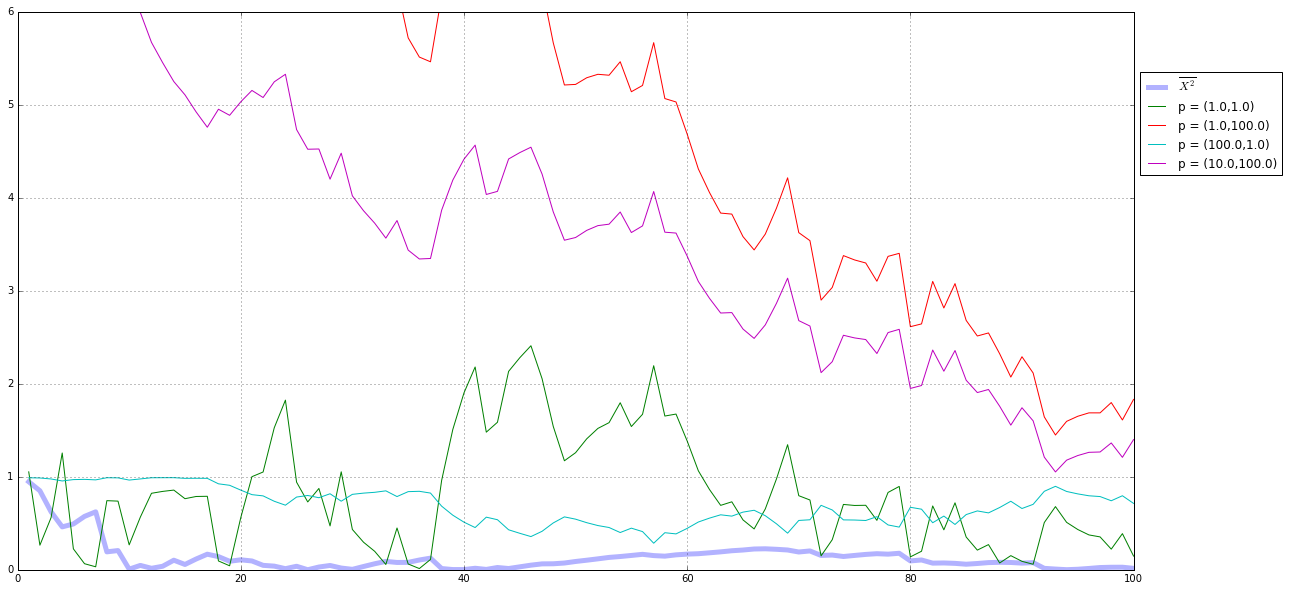

In [20]:
build_graphs(x_2,bayes_estim)

Вывод:

Из графиков видно, что среди байесовских оценок лучшая- с априорным $\Gamma_{Inv}$(1,1), но однако она все равно хуже, чем оценка методом максимального правдоподобия